 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_all_homes_sac_percent.pkl', 'rb') as fp:
    all_homes_sac_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_all_homes_sac_price.pkl', 'rb') as fp:
    all_homes_sac_price = pickle.load(fp)

In [4]:
all_homes_sac_percent.head(5)

,95630,95608,95823,95758,95670,95624,95831,95828,95628,95610,...,95811,95832,95683,95693,95626,95690,95641,95638,95615,95830
02/2000,0.425727,0.424011,0.423662,0.435385,0.356149,0.382807,0.426160,0.443003,0.468502,0.382286,...,0.253983,0.459801,0.359335,0.441025,0.127956,0.041617,0.251008,0.406751,0.193502,0.015684
03/2000,0.490213,0.548487,0.548872,0.558179,0.509983,0.459410,0.577183,0.462052,0.506288,0.458966,...,0.303500,0.416230,0.139036,0.313233,0.439605,1.637625,-0.040330,0.186866,1.080709,0.469476
04/2000,0.897910,0.906885,0.993996,0.983876,0.890557,0.849513,0.903105,0.934565,0.866245,0.908509,...,0.281059,0.708242,0.507862,0.917489,0.900082,1.373156,-0.874160,0.880851,1.089176,0.577812
05/2000,0.941558,0.952231,1.009911,1.044207,0.933247,0.931383,0.963911,1.011829,0.997306,1.062259,...,0.674797,0.546981,0.497553,1.070627,0.897817,1.986341,-0.667620,1.365297,1.217780,0.438945
06/2000,0.832938,0.716222,0.891267,0.891089,0.604854,0.802604,0.656924,0.967519,0.769747,1.016484,...,0.304727,0.709438,0.643495,0.779605,0.570604,0.625613,-0.620888,2.259343,-0.115169,0.106261


In [5]:
all_homes_sac_price.head()

,95630,95608,95823,95758,95670,95624,95831,95828,95628,95610,...,95811,95832,95683,95693,95626,95690,95641,95638,95615,95830
01/2000,235832.0,174288.0,114478.0,172491.0,151622.0,188868.0,183734.0,127990.0,194236.0,151719.0,...,157097.0,127229.0,242949.0,283204.0,136766.0,170603.0,178082.0,219053.0,172608.0,312427.0
02/2000,236836.0,175027.0,114963.0,173242.0,152162.0,189591.0,184517.0,128557.0,195146.0,152299.0,...,157496.0,127814.0,243822.0,284453.0,136941.0,170674.0,178529.0,219944.0,172942.0,312476.0
03/2000,237997.0,175987.0,115594.0,174209.0,152938.0,190462.0,185582.0,129151.0,196134.0,152998.0,...,157974.0,128346.0,244161.0,285344.0,137543.0,173469.0,178457.0,220355.0,174811.0,313943.0
04/2000,240134.0,177583.0,116743.0,175923.0,154300.0,192080.0,187258.0,130358.0,197833.0,154388.0,...,158418.0,129255.0,245401.0,287962.0,138781.0,175851.0,176897.0,222296.0,176715.0,315757.0
05/2000,242395.0,179274.0,117922.0,177760.0,155740.0,193869.0,189063.0,131677.0,199806.0,156028.0,...,159487.0,129962.0,246622.0,291045.0,140027.0,179344.0,175716.0,225331.0,178867.0,317143.0


  train test split

In [6]:
trdf_percent = all_homes_sac_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = all_homes_sac_price.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
all_homes_sac_percent.head(3)

,95630,95608,95823,95758,95670,95624,95831,95828,95628,95610,...,95811,95832,95683,95693,95626,95690,95641,95638,95615,95830
02/2000,0.425727,0.424011,0.423662,0.435385,0.356149,0.382807,0.426160,0.443003,0.468502,0.382286,...,0.253983,0.459801,0.359335,0.441025,0.127956,0.041617,0.251008,0.406751,0.193502,0.015684
03/2000,0.490213,0.548487,0.548872,0.558179,0.509983,0.459410,0.577183,0.462052,0.506288,0.458966,...,0.303500,0.416230,0.139036,0.313233,0.439605,1.637625,-0.040330,0.186866,1.080709,0.469476
04/2000,0.897910,0.906885,0.993996,0.983876,0.890557,0.849513,0.903105,0.934565,0.866245,0.908509,...,0.281059,0.708242,0.507862,0.917489,0.900082,1.373156,-0.874160,0.880851,1.089176,0.577812


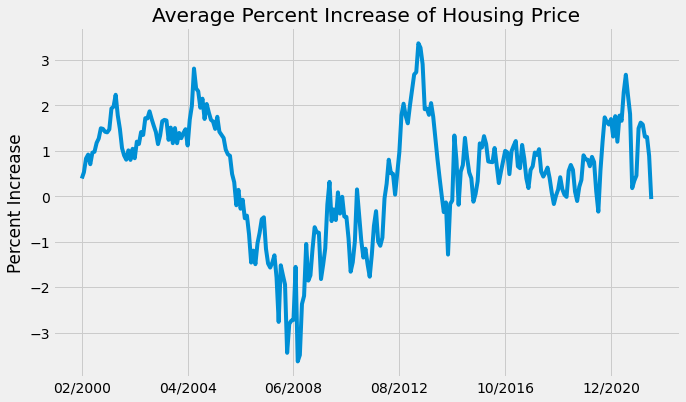

In [9]:
mean = np.mean(all_homes_sac_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of Housing Price')
plt.show()

Average Housing Price

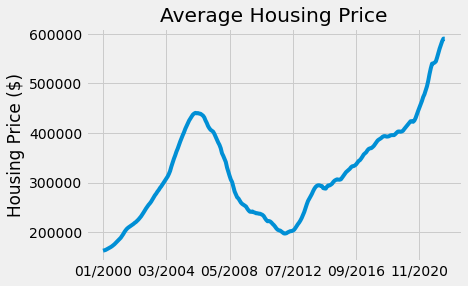

In [10]:
price_mean = np.mean(all_homes_sac_price, axis = 1)
ax = price_mean.plot(figsize = (6, 4))
plt.ylabel('Housing Price ($)')
plt.title('Average Housing Price')
plt.show()

 Percent Increase All Zip Codes

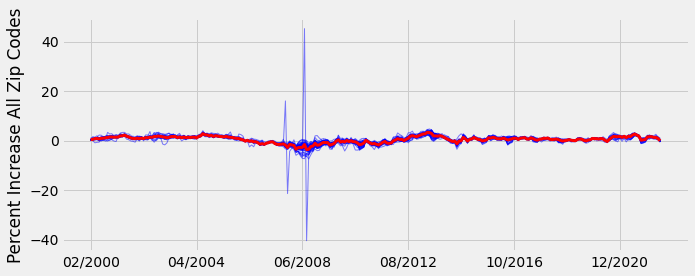

In [11]:
all_homes_sac_percent.plot(figsize = (10, 4), lw = 1, color = 'blue', alpha = 0.5)
mean.plot(c = 'red', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
all_homes_sac_price.head(3)

,95630,95608,95823,95758,95670,95624,95831,95828,95628,95610,...,95811,95832,95683,95693,95626,95690,95641,95638,95615,95830
01/2000,235832.0,174288.0,114478.0,172491.0,151622.0,188868.0,183734.0,127990.0,194236.0,151719.0,...,157097.0,127229.0,242949.0,283204.0,136766.0,170603.0,178082.0,219053.0,172608.0,312427.0
02/2000,236836.0,175027.0,114963.0,173242.0,152162.0,189591.0,184517.0,128557.0,195146.0,152299.0,...,157496.0,127814.0,243822.0,284453.0,136941.0,170674.0,178529.0,219944.0,172942.0,312476.0
03/2000,237997.0,175987.0,115594.0,174209.0,152938.0,190462.0,185582.0,129151.0,196134.0,152998.0,...,157974.0,128346.0,244161.0,285344.0,137543.0,173469.0,178457.0,220355.0,174811.0,313943.0


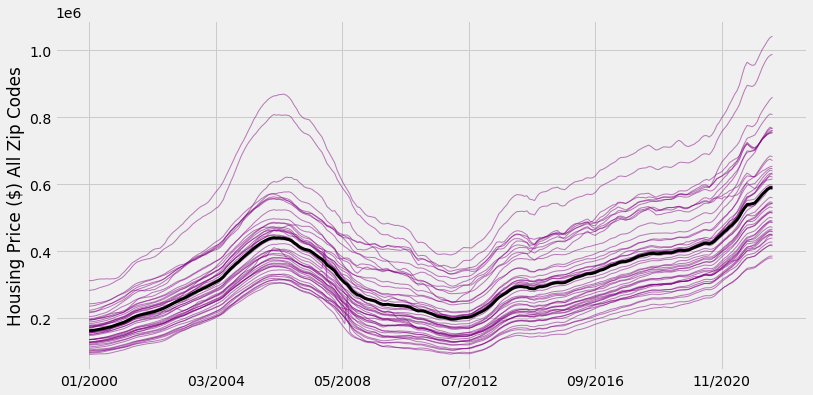

In [13]:
all_homes_sac_price.plot(figsize = (12, 6), lw = 1, color = 'purple', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Housing Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [19]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95630, 95608, 95818, 95632, 95824]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95834
